In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
filename = "car_price.csv"
data = read_csv(filename)


VERİ ANALİZİ

In [2]:
data.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

Veri setinde 301 gözlem, 9 değişken bulunmakta.

In [4]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Veri setinde kayıp veri bulunmamakta.

In [6]:
info = data.groupby("Owner").size()
print(info)

Owner
0    290
1     10
3      1
dtype: int64


Arabalardan 290 tanesi 0 model araç, 10 tanesinin önceden 1 kullanıcısı , 1 tanesinin ise önceden 3 kullanıcısı olmuş.

In [7]:
info2 = data.groupby("Fuel_Type").size()
print(info2)

Fuel_Type
CNG         2
Diesel     60
Petrol    239
dtype: int64


Arabalardan 239 tanesinin yakıt türü benzin, 60 tanesinin dizel, 2 tanesininki ise CNG.

In [8]:
info3 = data.groupby("Seller_Type").size()
print(info3)

Seller_Type
Dealer        195
Individual    106
dtype: int64


Arabalardan 195 tanesi satış bayileri tarafından, 106 tanesi ise bireysel(sahibinden) olarak satışa sunulmuştur.

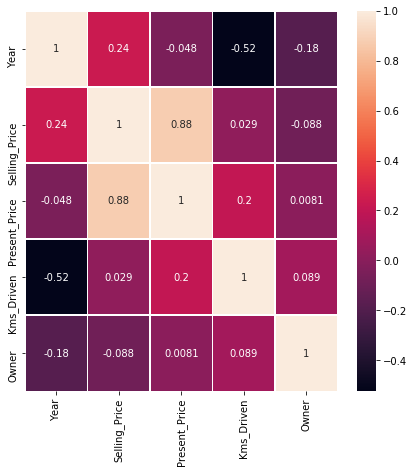

In [9]:
j = data.corr()
f, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(j, annot = True, linewidths = .5, ax = ax)

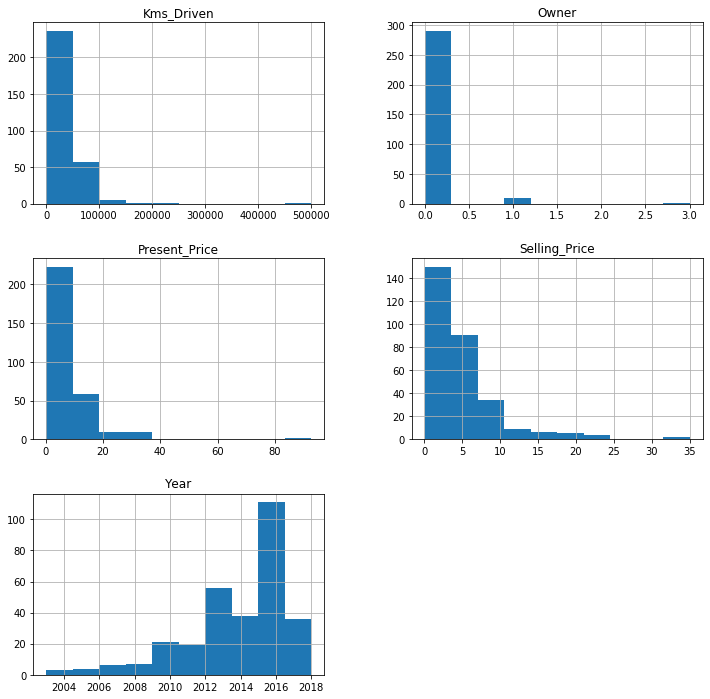

In [10]:
data.hist(figsize = (12, 12))
plt.show()

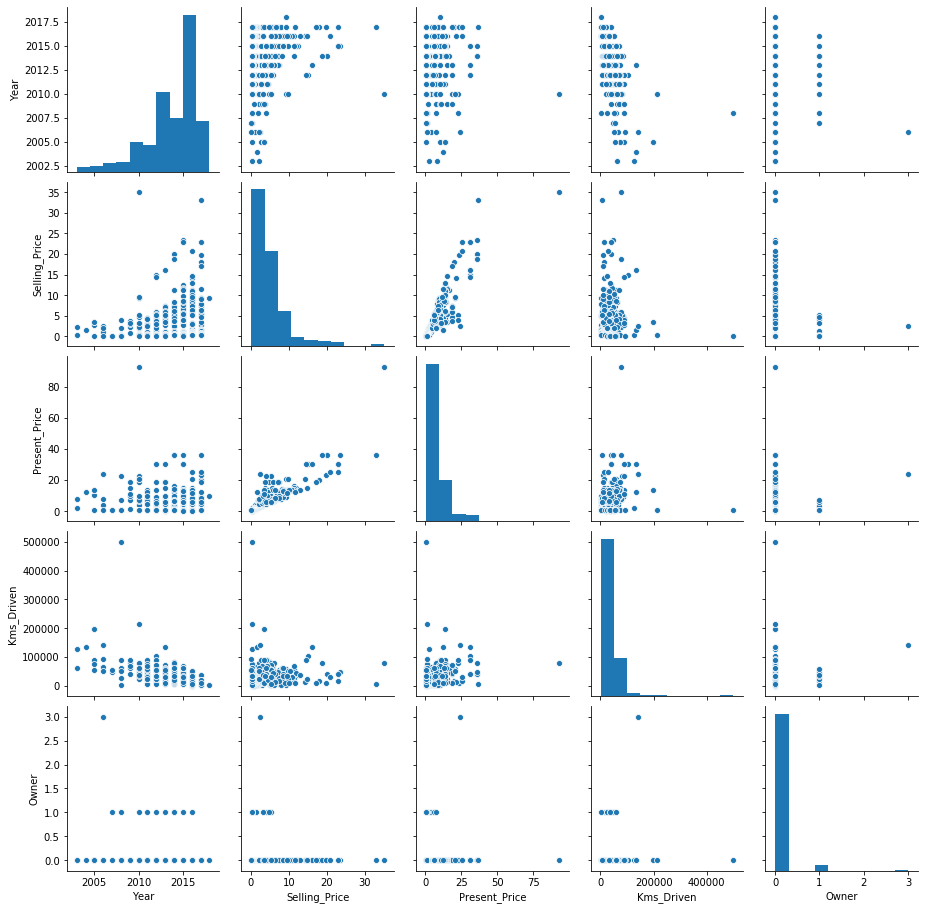

In [11]:
sns.pairplot(data)

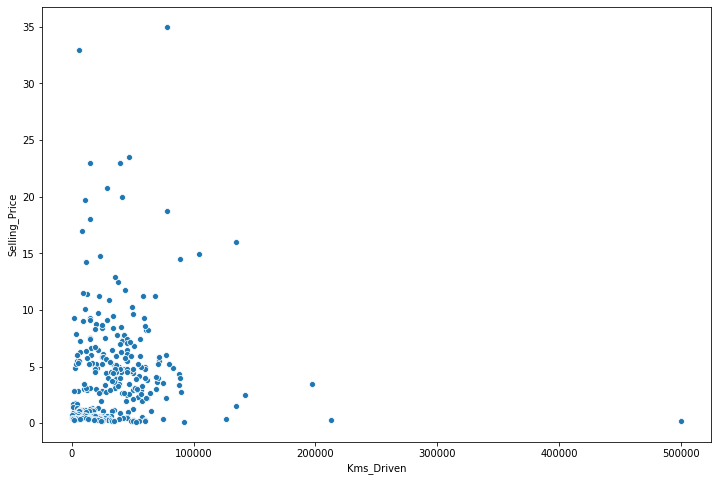

In [3]:
fig, ax1 = plt.subplots(figsize = (12, 8))
sns.scatterplot(x = "Kms_Driven", y = "Selling_Price", data = data, ax = ax1)

Dağılım grafiğine bakarak kilometre sayacı düşük olan arabaların fiyatlarının daha yüksek olduğunu söyleyebiliriz.

In [13]:
data["yaş"] = 2020 - data.Year
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,yaş
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


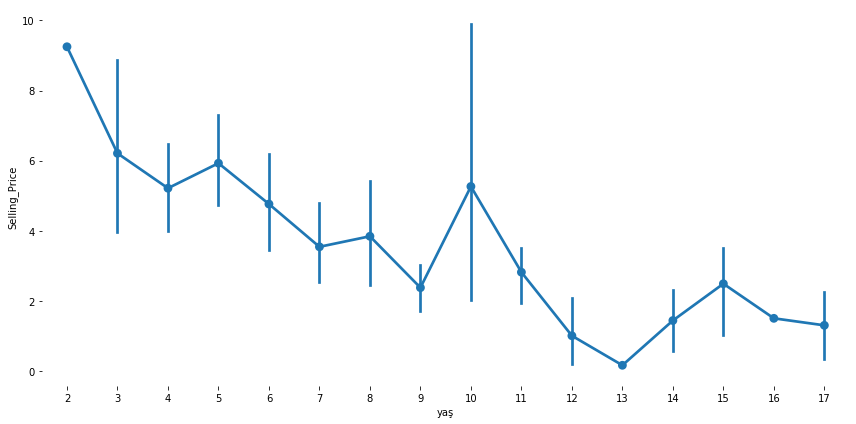

In [14]:
sns.catplot(x = "yaş", y = "Selling_Price", data = data, kind = "point", height = 6, aspect = 2)
sns.despine(left=True,bottom=True)

Arabanın yaşı ve satış fiyatı arasındaki ilişkiyi görselleştiren nokta grafiğe bakarak, genel olarak arabanın yaşının büyüdükçe satış fiyatının azaldığını söyleyebiliriz.

                                               MODELLEME

Veri setindeki kategorik değerlerin de tahminlerde kullanılabilmesi için Label Encoder kullanarak kategorik değerleri makine öğrenmesi algoritmalarına uygun bir forma dönüştüreceğim.

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = pd.get_dummies(data['Fuel_Type'],prefix='FT',drop_first=True)
data['Seller_Type'] = le.fit_transform(data['Seller_Type'])
data['Transmission'] = le.fit_transform(data['Transmission'])
data = pd.concat([data,df],axis=1)
data.drop(['Fuel_Type'],axis=1,inplace=True)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,yaş,FT_Diesel,FT_Petrol
0,ritz,2014,3.35,5.59,27000,0,1,0,6,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,7,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,3,0,1
3,wagon r,2011,2.85,4.15,5200,0,1,0,9,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,6,1,0


Kategorik değerler uygun forma dönüştürüldü.
Dizel - Petrol değişkenlerinde 1 değeri olumlu, 0 değeri olumsuz anlamdadır.
Satıcı türünde 0 satış bayisini, 1 değeri ise bireysel(sahibinden) satışı temsil eder.
Vites türünde 0 manual vitesi, 1 ise otomatik vitesi temsil eder.

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(["Selling_Price", "Car_Name"], axis = 1) #Girdi
Y = data["Selling_Price"] #Çıktı

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [17]:
from sklearn.preprocessing import StandardScaler  #Verinin normalize edilmesi
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model1 = lr.fit(X_train_std ,Y_train)
test_tahmin = model1.predict(X_test_std)
eğitim_tahmin = model1.predict(X_train_std)


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print("Eğitim verisi için R-Kare değeri: %.3f " % r2_score(eğitim_tahmin, Y_train))
print("Test verisi için R-Kare değeri:  %.3f  " % r2_score(test_tahmin, Y_test))

Eğitim verisi için R-Kare değeri: 0.882 
Test verisi için R-Kare değeri:  0.805  


In [20]:
print("Eğitim verisi için Ortalama Hata Kare (MSE): %.3f " % mean_squared_error(eğitim_tahmin, Y_train))
print("Test verisi için Ortalama Hata Kare (MSE):   %.3f " % mean_squared_error(test_tahmin, Y_test))

Eğitim verisi için Ortalama Hata Kare (MSE): 2.744 
Test verisi için Ortalama Hata Kare (MSE):   3.965 


                                         Yapay Sinir Ağları Algoritması (MLP)

In [21]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = "relu", hidden_layer_sizes = [10], solver = "lbfgs", max_iter = 20000, tol = 0.000001)
mlp.fit(X_train_std, Y_train)

pre_train = mlp.predict(X_train_std)
pre_test = mlp.predict(X_test_std)
print("R-kare eğitim: %.3f" % r2_score(Y_train, pre_train))
print("R-kare test  : %.3f" % r2_score(Y_test, pre_test))
print("\n")
print("Eğitim verisi için Ortalama Hata Kare (MSE): %.3f" % mean_squared_error(Y_train,pre_train))
print("Test verisi için Ortalama Hata Kare (MSE)  : %.3f" % mean_squared_error(Y_test, pre_test))

R-kare eğitim: 0.984
R-kare test  : 0.959


Eğitim verisi için Ortalama Hata Kare (MSE): 0.408
Test verisi için Ortalama Hata Kare (MSE)  : 1.024


Yapay sinir ağları algoritması ile daha başarılı bir sonuç elde edildi.
Eğitim ve test sonuçları arasındaki büyük bir fark olmadığı için aşırı öğrenme, ezberleme olmadığını söyleyebiliriz.

                                     KARAR AĞAÇLARI ALGORİTMASI

In [22]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor
KAR = dtr(max_leaf_nodes = 30, random_state = 0, max_depth = 10)
KAR.fit(X_train, Y_train)

pred_train = KAR.predict(X_train)
pred_test = KAR.predict(X_test)

print("R-kare eğitim: %.4f" % r2_score(Y_train, pred_train))
print("R-kare test: %.4f \n" % r2_score(Y_test, pred_test))
print("MSE-eğitim: %.3f" % mean_squared_error(Y_train,pred_train))
print("MSE-test: %.3f" % mean_squared_error(Y_test, pred_test))

R-kare eğitim: 0.9929
R-kare test: 0.8996 

MSE-eğitim: 0.183
MSE-test: 2.519


Karar Ağaçları Algoritması İçin Parametre Optimizasyonu

In [24]:
from sklearn.model_selection import GridSearchCV
model1 = DecisionTreeRegressor()
parameters1 = {"max_leaf_nodes": [1, 2, 5, 10, 20, 30, 40, 50, 60],
              "min_samples_leaf": [1, 2, 4, 5, 6, 7, 8, 10, 20],
              "min_samples_split": [1, 2, 3, 4, 5, 6, 7, 8, 10, 15]   
             }
grid1 = GridSearchCV(estimator = model1, param_grid = parameters1, cv = 10, verbose = 1, n_jobs = -1)
grid1.fit(X_train, Y_train)
print("En iyi estimator:  ", grid1.best_estimator_)
print("En iyi skor: ", grid1.best_score_)
print("En iyi parametreler ", grid1.best_params_)

Fitting 10 folds for each of 810 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 4544 tasks      | elapsed:   19.3s


En iyi estimator:   DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=40,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
En iyi skor:  0.8449391339592637
En iyi parametreler  {'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 8074 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed:   28.7s finished


In [26]:
npred_test = grid1.predict(X_test)
npred_train = grid1.predict(X_train)

print("R-kare eğitim: %.4f" % r2_score(Y_train, npred_train))
print("R-kare test: %.4f \n" % r2_score(Y_test, npred_test))
print("MSE-eğitim: %.3f" % mean_squared_error(Y_train,npred_train))
print("MSE-test: %.3f" % mean_squared_error(Y_test, npred_test))

R-kare eğitim: 0.9960
R-kare test: 0.9072 

MSE-eğitim: 0.105
MSE-test: 2.327
